#Réglages Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
%cd /content/drive/My\ Drive/DL

/content/drive/My Drive/DL


In [5]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.2.0rc3:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0rc3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0rc3


In [6]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 29kB/s 
     |████████████████████████████████| 3.9MB 51.8MB/s 
     |████████████████████████████████| 450kB 44.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=df5de14844cc7e30c8cbcf1165e65997e11bc6b77b4c5d19feb09355a1de869a
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0


In [7]:
!pip install keract

In [8]:
!pip install -q git+https://www.github.com/google/neural-tangents

In [0]:
%load_ext autoreload
%autoreload 2

#Importation des données

In [3]:
import time
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random 
from utils.evaluation import evaluate, plot_confusion_matrix
from utils.visualization import visualize_mitbih, plot_bar
from utils.preprocessing_data import read_dataset, split_dataset

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
np.random.seed(0)
random.seed(0)

In [0]:
def boldprint(s):
    print('\033[1m' + s + '\033[0m')

In [0]:
data,labels = read_dataset('mitbih_train.csv','mitbih_test.csv')

In [0]:
sorted_labels = ['Normal beat', 'Supraventricular ectopic beats','Ventricular ectopic beats', 'Fusion Beats', 'Unknown Beats']

#Visualisation des données

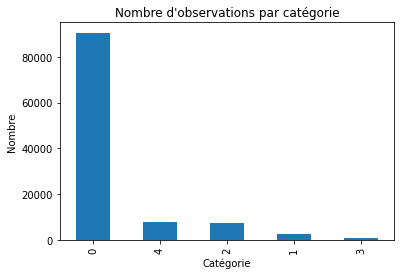

In [8]:
plot_bar(labels)

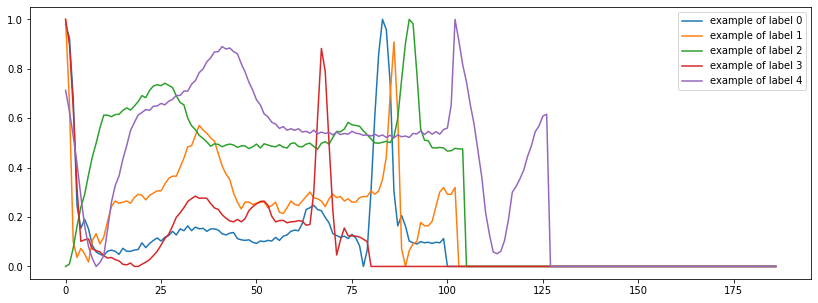

In [9]:
visualize_mitbih(data,labels)

### Benchmark avec des modèles Machine Learning

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from scipy.sparse import vstack

In [0]:
xtrain,ytrain,xval,yval,y_val_true,xtest,ytest,y_test_true  = split_dataset(data, labels, Deep = False, modele = 'ML', validation=True , val_prop = 0.2)

Une rapide optimisation des modèles de Machine Learning "à la main et par expérimentation" dans la mesure où une gridsearch prendrait énormément de temps

In [0]:
classifiers = {'Logistic regression':LogisticRegression(C = 1, max_iter = 400, random_state=0),
               'SVM':SVC(C = 10,gamma = 0.1, random_state=0),
               'Random Forest': RandomForestClassifier(n_estimators = 300, criterion = 'gini', max_depth = 300, min_samples_split = 500, random_state=0),
               'Multi Layer Perceptron':MLPClassifier(hidden_layer_sizes = (100,),activation = 'relu',solver = 'adam', learning_rate= 'constant',random_state=0)}

In [78]:
for name,clf in classifiers.items():
    clf.fit(xtrain,ytrain)
    ypred = clf.predict(xval)
    boldprint('--------------'+name+'--------------')
    print(evaluate(yval,ypred))

--------------Logistic regression--------------
   accuracy    recall  precision  f1-score
0  0.913884  0.562565    0.80047  0.634796
--------------SVM--------------
   accuracy    recall  precision  f1-score
0  0.978482  0.827625   0.941481  0.875588
--------------Random Forest--------------
   accuracy    recall  precision  f1-score
0  0.948604  0.600959   0.775859  0.661936
--------------Multi Layer Perceptron--------------
   accuracy    recall  precision  f1-score
0  0.976838  0.867649   0.900407  0.883092


In [0]:
xtrain_ = vstack((xtrain, xval)) 
ytrain_ = np.concatenate((ytrain, yval))

Le code suivant permet d'apprécier les performances des modèles ML sur le set de test.

--------------Logistic regression--------------
Training time: 57.2s
                                precision    recall  f1-score   support

                   Normal beat       0.92      0.99      0.95     18118
Supraventricular ectopic beats       0.83      0.40      0.54       556
     Ventricular ectopic beats       0.65      0.33      0.44      1447
                  Fusion Beats       0.65      0.22      0.33       161
                 Unknown Beats       0.96      0.88      0.92      1608

                      accuracy                           0.91     21890
                     macro avg       0.80      0.56      0.64     21890
                  weighted avg       0.90      0.91      0.90     21890



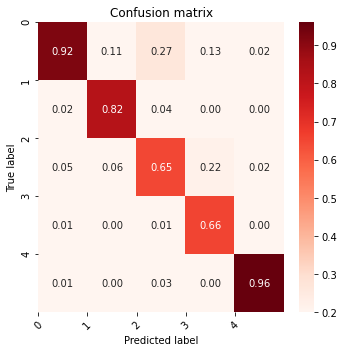

--------------SVM--------------
Training time: 403.5s
                                precision    recall  f1-score   support

                   Normal beat       0.98      1.00      0.99     18118
Supraventricular ectopic beats       0.94      0.64      0.77       556
     Ventricular ectopic beats       0.97      0.92      0.94      1447
                  Fusion Beats       0.92      0.61      0.74       161
                 Unknown Beats       0.99      0.96      0.98      1608

                      accuracy                           0.98     21890
                     macro avg       0.96      0.83      0.88     21890
                  weighted avg       0.98      0.98      0.98     21890



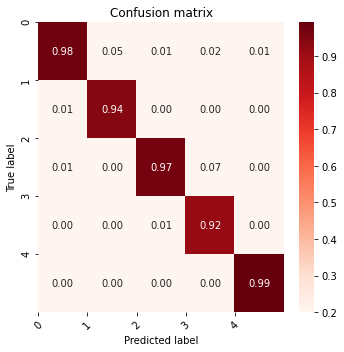

--------------Random Forest--------------
Training time: 708.8s
                                precision    recall  f1-score   support

                   Normal beat       0.94      1.00      0.97     18118
Supraventricular ectopic beats       0.96      0.38      0.54       556
     Ventricular ectopic beats       0.97      0.73      0.83      1447
                  Fusion Beats       0.00      0.00      0.00       161
                 Unknown Beats       0.99      0.88      0.93      1608

                      accuracy                           0.95     21890
                     macro avg       0.77      0.60      0.65     21890
                  weighted avg       0.94      0.95      0.94     21890



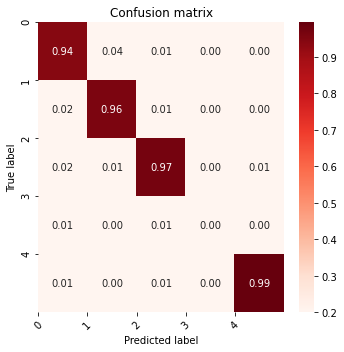

--------------Multi Layer Perceptron--------------
Training time: 1120.2s
                                precision    recall  f1-score   support

                   Normal beat       0.98      1.00      0.99     18118
Supraventricular ectopic beats       0.89      0.68      0.77       556
     Ventricular ectopic beats       0.97      0.90      0.93      1447
                  Fusion Beats       0.93      0.65      0.76       161
                 Unknown Beats       1.00      0.97      0.98      1608

                      accuracy                           0.98     21890
                     macro avg       0.95      0.84      0.89     21890
                  weighted avg       0.98      0.98      0.98     21890



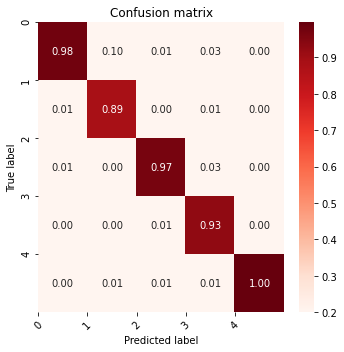

In [80]:
for name,clf in classifiers.items():
    boldprint('--------------'+name+'--------------')
    start = time.time()
    clf.fit(xtrain_,ytrain_)
    end = time.time()
    print(f'Training time: {end-start:.1f}s')
    ypred = clf.predict(xtest)
    print(classification_report(ytest,ypred,target_names = sorted_labels))
    plot_confusion_matrix(ytest,ypred, sorted_labels)

#Deep Learning

In [0]:
import numpy as np
import pandas as pd
import warnings
import tensorflow
from tensorflow.python.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, BatchNormalization
from tensorflow.python.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten, MaxPool1D
from tensorflow.keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.python.keras import optimizers
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint
from tensorflow.python.keras.optimizers import Adam
from keras import regularizers
from sklearn.metrics import classification_report
from keras import backend as K
from utils.training import train_deep_modele
from utils.evaluation import evaluate, plot_confusion_matrix
from utils.visualization import visualize_mitbih, plot_bar
from utils.preprocessing_data import read_dataset, split_dataset
warnings.filterwarnings('ignore')

## Deep Learning simple

### CNN

In [0]:
xtrain,ytrain,xval,yval,y_val_true,xtest,ytest,y_test_true  = split_dataset(data, labels, Deep = True, modele = 'CNN', validation=True , val_prop = 0.2)

In [35]:
model_CNN = Sequential()
im_shape=(xtrain.shape[1],1)
model_CNN.add(Conv1D(64, (3), input_shape=im_shape, activation='relu'))
model_CNN.add(Flatten())
model_CNN.add(Dense(64, activation='softmax'))
model_CNN.add(Dense(5, activation='softmax'))
model_CNN.compile(optimizer = tensorflow.keras.optimizers.Adam(lr = 0.01), loss='categorical_crossentropy', metrics = ['accuracy'])
model_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 185, 64)           256       
_________________________________________________________________
flatten_2 (Flatten)          (None, 11840)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                757824    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 325       
Total params: 758,405
Trainable params: 758,405
Non-trainable params: 0
_________________________________________________________________


In [0]:
earlystopper = EarlyStopping(patience=4, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=2, verbose=1)
callbacks = [earlystopper, reduce_lr]

Train on 65667 samples, validate on 21889 samples
Epoch 1/40
65667/65667 [==============================] - 3s 48us/sample - loss: 0.7026 - accuracy: 0.8262 - val_loss: 0.6575 - val_accuracy: 0.8277
Epoch 2/40
65667/65667 [==============================] - 3s 41us/sample - loss: 0.6575 - accuracy: 0.8277 - val_loss: 0.6574 - val_accuracy: 0.8277
Epoch 3/40
65667/65667 [==============================] - 3s 41us/sample - loss: 0.6576 - accuracy: 0.8277 - val_loss: 0.6575 - val_accuracy: 0.8277
Epoch 4/40
64640/65667 [============================>.] - ETA: 0s - loss: 0.6577 - accuracy: 0.8276
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
65667/65667 [==============================] - 3s 42us/sample - loss: 0.6576 - accuracy: 0.8277 - val_loss: 0.6574 - val_accuracy: 0.8277
Epoch 5/40
65667/65667 [==============================] - 3s 42us/sample - loss: 0.6574 - accuracy: 0.8277 - val_loss: 0.6572 - val_accuracy: 0.8277
Epoch 6/40
65667/65667 [============

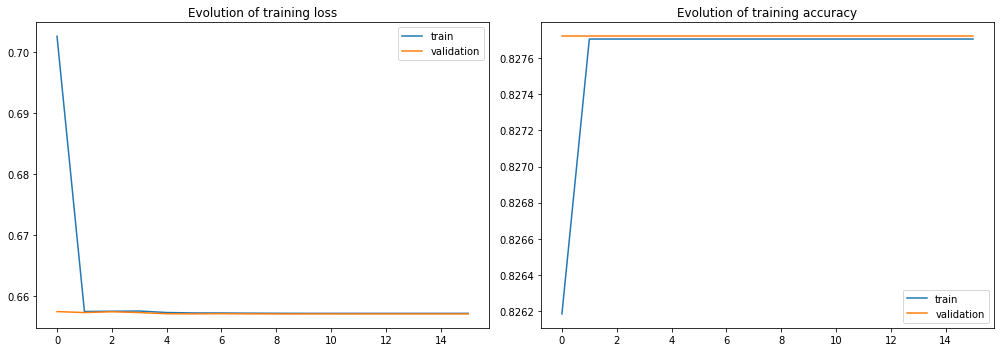

In [37]:
train_deep_modele(model_CNN, xtrain, ytrain, epochs = 40, callbacks = callbacks, batch_size = 128, val_data = (xval, yval))

   accuracy  recall  precision  f1-score
0  0.827684     0.2   0.165537  0.181144


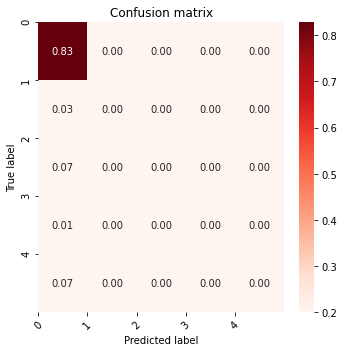

In [38]:
ypred = model_CNN.predict(xtest)
print(evaluate(ytest.argmax(axis=1), ypred.argmax(axis=1)))
plot_confusion_matrix(ytest.argmax(axis=1), ypred.argmax(axis=1), sorted_labels)

### RNN

In [0]:
xtrain,ytrain,xval,yval,y_val_true,xtest,ytest,y_test_true  = split_dataset(data, labels, Deep = True, modele = 'RNN', validation=True , val_prop = 0.2)

In [0]:
n_most_common_words = 6000
emb_dim = 100
model_LSTM = Sequential()
model_LSTM.add(Embedding(n_most_common_words, emb_dim, input_length = xtrain.shape[1]))
model_LSTM.add(LSTM(100))
model_LSTM.add(Dense(5, activation='softmax'))
model_LSTM.compile(optimizer =  tensorflow.keras.optimizers.Adam(lr = 0.01) , loss='categorical_crossentropy', metrics=['accuracy'])
print(model_LSTM.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          600000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 680,905
Trainable params: 680,905
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
earlystopper = EarlyStopping(patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=3, verbose=1)
callbacks = [earlystopper, reduce_lr]

Train on 60412 samples, validate on 27142 samples
Epoch 1/40
60412/60412 [==============================] - 219s 4ms/sample - loss: 0.6664 - accuracy: 0.8277 - val_loss: 0.6619 - val_accuracy: 0.8277
Epoch 2/40
60412/60412 [==============================] - 218s 4ms/sample - loss: 0.6659 - accuracy: 0.8260 - val_loss: 0.6641 - val_accuracy: 0.8277
Epoch 3/40
60412/60412 [==============================] - 217s 4ms/sample - loss: 0.6598 - accuracy: 0.8277 - val_loss: 0.6577 - val_accuracy: 0.8277
Epoch 4/40
60412/60412 [==============================] - 218s 4ms/sample - loss: 0.6589 - accuracy: 0.8277 - val_loss: 0.6582 - val_accuracy: 0.8277
Epoch 5/40
60412/60412 [==============================] - 219s 4ms/sample - loss: 0.6586 - accuracy: 0.8277 - val_loss: 0.6585 - val_accuracy: 0.8277
Epoch 6/40
60288/60412 [============================>.] - ETA: 0s - loss: 0.6582 - accuracy: 0.8277
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
60412/60412 [=======

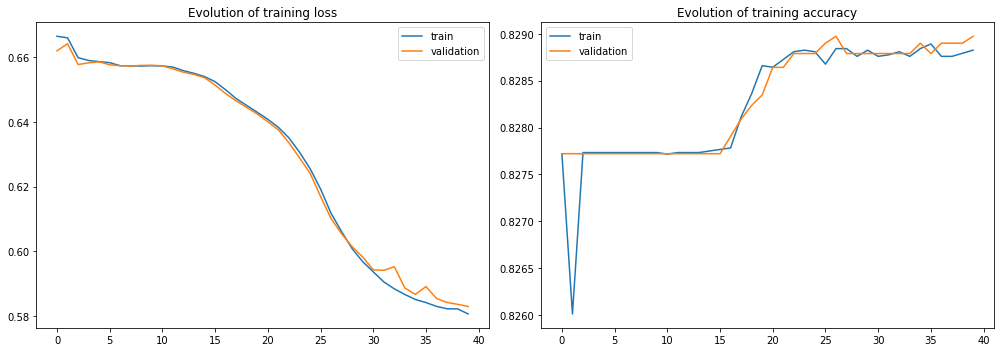

In [0]:
train_deep_modele(model_LSTM, xtrain, ytrain, epochs = 40, callbacks = callbacks, batch_size = 128, val_data =  (xval, yval))

   accuracy    recall  precision  f1-score
0  0.828613  0.206851   0.272113  0.194733


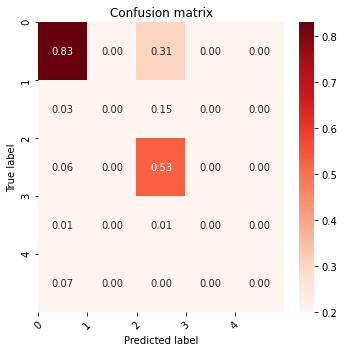

In [0]:
ypred = model_LSTM.predict(xtest)
print(evaluate(ytest.argmax(axis=1), ypred.argmax(axis=1)))
plot_confusion_matrix(ytest.argmax(axis=1), ypred.argmax(axis=1), sorted_labels)


## Deep Learning plus sophistiqué


ResNet

In [0]:
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
from models.resnet import Classifier_RESNET

In [0]:
xtrain,ytrain,xval,yval,y_val_true,xtest,ytest,y_test_true  = split_dataset(data, labels, Deep = True, modele = 'CNN', validation=True , val_prop = 0.2)

In [0]:
earlystopper = EarlyStopping(patience=5, verbose=1)
rlr = ReduceLROnPlateau(patience=3, verbose=1)
callbacks = [earlystopper,rlr]

In [42]:
resnet = Classifier_RESNET('save/',input_shape=(xtrain.shape[1],1), nb_classes=5,Early_Stopping = earlystopper,reduce_lr = rlr,n_feature_maps = (50,100,100),kernel_size=(8,5,3,2), verbose=1)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 187, 50)      450         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 187, 50)      200         conv1d_3[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 187, 50)      0           batch_normalization[0][0]        
______________________________________________________________________________________________

Train on 65667 samples, validate on 21889 samples
Epoch 1/40
65664/65667 [============================>.] - ETA: 0s - loss: 0.2090 - accuracy: 0.9420WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: save/best_model.resnet/assets
65667/65667 [==============================] - 44s 671us/sample - loss: 0.2090 - accuracy: 0.9420 - val_loss: 2.3538 - val_accuracy: 0.1107
Epoch 2/40
65667/65667 [==============================] - 39s 597us/sample - loss: 0.1182 - accuracy: 0.9674 - val_loss: 0.2052 - val_accuracy: 0.9331
Epoch 3/40
65667/65667 [==============================] - 39s 598us/sample - loss: 0.0992 - accuracy: 0.9724 - val_loss: 0.1628 - val

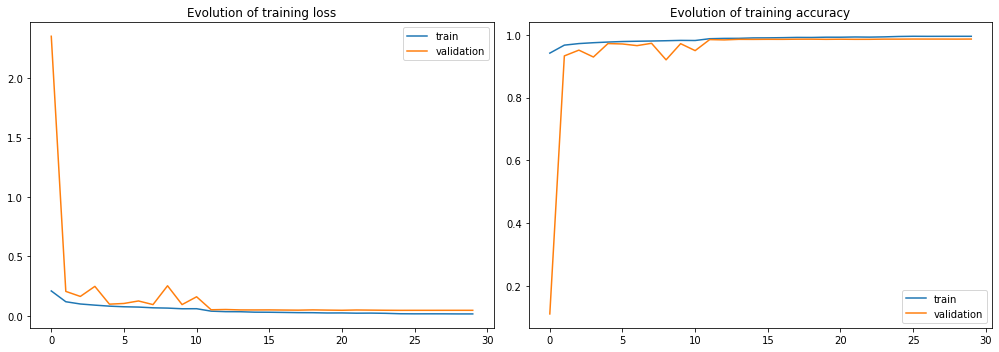

In [43]:
hist = train_deep_modele(resnet, xtrain, ytrain, epochs = 40, callbacks = callbacks, batch_size = 128, val_data = (xval, yval))

   accuracy    recall  precision  f1-score
0    0.9873  0.907555   0.966045  0.934433


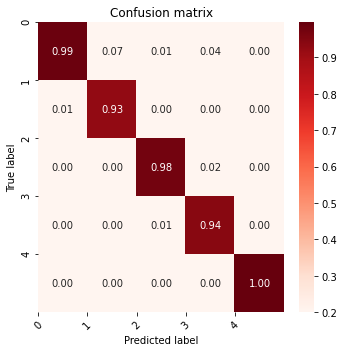

In [44]:
ypred = resnet.predict(xtest)
print(evaluate(ytest.argmax(axis=1), ypred.argmax(axis=1)))
plot_confusion_matrix(ytest.argmax(axis=1), ypred.argmax(axis=1), sorted_labels)

## CNN  de l'aticle associé

In [0]:
from models.cnn_article import CNN_simple
import math

In [0]:
xtrain,ytrain,xval,yval,y_val_true,xtest,ytest,y_test_true  = split_dataset(data, labels, Deep = True, modele = 'CNN', validation=True , val_prop = 0.2)

In [0]:
batch_size = 500
n_obs = xtrain.shape[0]

def exp_decay(epoch):
    initial_lrate = 0.001
    k = 0.75
    t = n_obs//(10000 * batch_size) 
    lrate = initial_lrate * math.exp(-k*t)
    return lrate

earlystopper = EarlyStopping(patience=5, verbose=1)
lrate = LearningRateScheduler(exp_decay)
callbacks = [lrate, earlystopper]

In [48]:
cnnarticle =  CNN_simple('save/',input_shape=(xtrain.shape[1],1), nb_classes=5,Early_Stopping = earlystopper,reduce_lr = lrate,n_feature_maps = 64,kernel_size=5, verbose=1)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 183, 32)      192         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 183, 32)      5152        conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 183, 32)      0           conv1d_1[0][0]                   
______________________________________________________________________________________________

Train on 65667 samples, validate on 21889 samples
Epoch 1/40
65667/65667 [==============================] - 10s 159us/sample - loss: 0.2298 - accuracy: 0.9363 - val_loss: 0.1394 - val_accuracy: 0.9611
Epoch 2/40
65667/65667 [==============================] - 6s 98us/sample - loss: 0.1175 - accuracy: 0.9677 - val_loss: 0.0868 - val_accuracy: 0.9757
Epoch 3/40
65667/65667 [==============================] - 6s 99us/sample - loss: 0.0880 - accuracy: 0.9757 - val_loss: 0.0765 - val_accuracy: 0.9775
Epoch 4/40
65667/65667 [==============================] - 7s 100us/sample - loss: 0.0746 - accuracy: 0.9782 - val_loss: 0.0702 - val_accuracy: 0.9798
Epoch 5/40
65667/65667 [==============================] - 7s 104us/sample - loss: 0.0656 - accuracy: 0.9815 - val_loss: 0.0669 - val_accuracy: 0.9803
Epoch 6/40
65667/65667 [==============================] - 6s 98us/sample - loss: 0.0596 - accuracy: 0.9822 - val_loss: 0.0634 - val_accuracy: 0.9810
Epoch 7/40
65667/65667 [============================

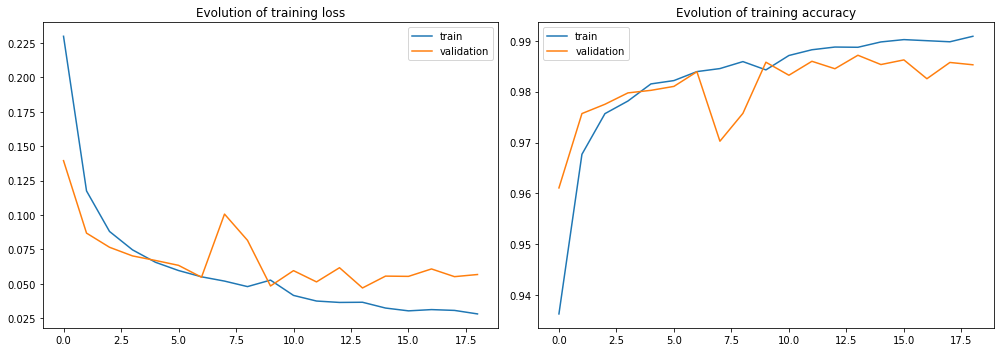

In [49]:
hist = train_deep_modele(cnnarticle, xtrain, ytrain, epochs = 40, callbacks = callbacks, batch_size = 128, val_data = (xval, yval))

   accuracy    recall  precision  f1-score
0  0.984879  0.883491   0.969088  0.921505


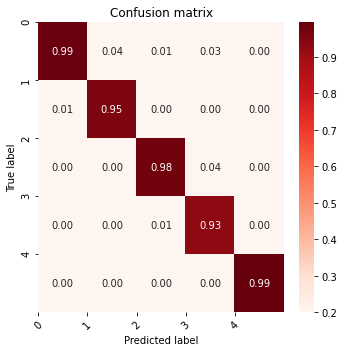

In [50]:
ypred = cnnarticle.predict(xtest)
print(evaluate(ytest.argmax(axis=1), ypred.argmax(axis=1)))
plot_confusion_matrix(ytest.argmax(axis=1), ypred.argmax(axis=1), sorted_labels)

## Interprétabilité des activation layers

In [0]:
import keract
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from utils.visualization import display_conv_activations

In [0]:
Resnet = tf.keras.models.load_model('save/best_model.resnet')

In [0]:
ypred = np.argmax(Resnet.predict(xtest),axis=1)
not_normal = []
for i in range(len(ypred)):
    if not ypred[i]==0: 
        not_normal.append(i)

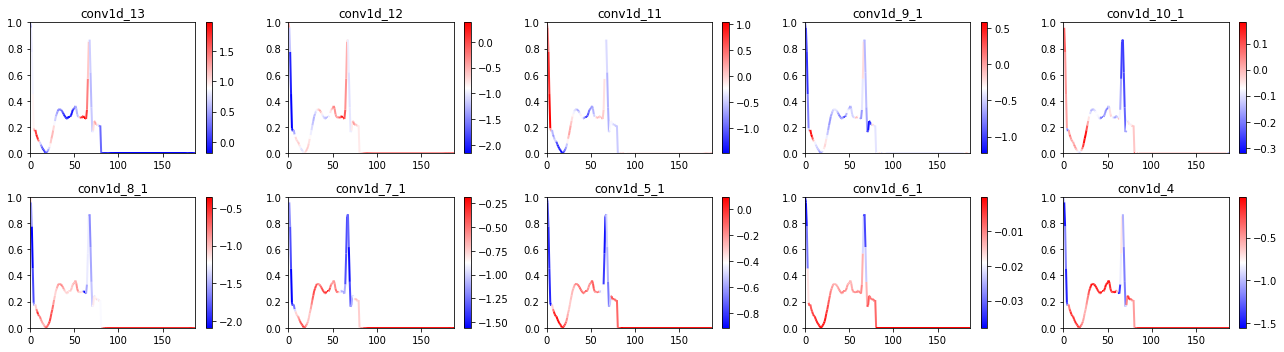

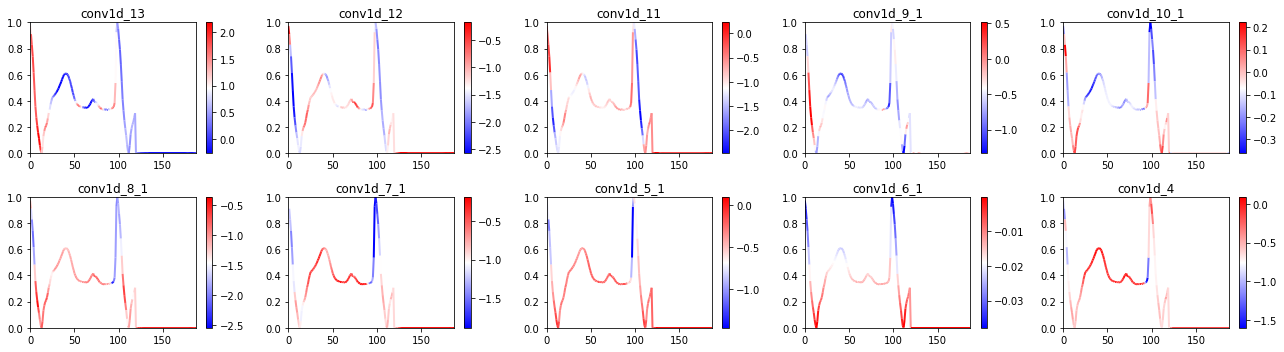

In [54]:
display_conv_activations(Resnet,xtest[not_normal[0]])
#display_conv_activations(Resnet,xtest[not_normal[1]])
#display_conv_activations(Resnet,xtest[not_normal[2]])
#display_conv_activations(Resnet,xtest[not_normal[3]])
display_conv_activations(Resnet,xtest[not_normal[4]])

### NTK

In [0]:
import neural_tangents as nt
from neural_tangents import stax
import numpy as np
import jax
from matplotlib import rcParams
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [10]:
xtrain,ytrain,xval,yval,y_val_true,xtest,ytest,y_test_true  = split_dataset(data, labels, Deep = True, modele = 'NTK', validation=True , val_prop = 0.2)
#xtrain.shape,ytrain.shape,xval.shape,yval.shape,y_val_true.shape

((10000, 187), (10000, 5), (10000, 187), (10000, 5), (10000,))

In [0]:
init_fn, apply_fn, kernel_fn = stax.serial(
    stax.Dense(512), stax.Relu(),
    stax.Dense(512), stax.Relu(),
    stax.Dense(512), stax.Relu(),
    stax.Dense(5)
)

In [0]:
nngp_mean, nngp_covariance = nt.predict.gp_inference(
    kernel_fn, xtrain, ytrain, xval, 
    diag_reg=1e-4, get='nngp', compute_cov=True)

In [14]:
nngp_mean

DeviceArray([[ 9.7778320e-01, -2.4871826e-02,  4.2053223e-02,
              -2.3193359e-03,  1.3763428e-02],
             [ 9.2749023e-01, -1.6815186e-02,  6.2561035e-02,
               1.5090942e-02,  3.4790039e-03],
             [ 2.3486328e-01, -1.4282227e-02,  2.7770996e-02,
               7.1888733e-01,  2.1728516e-02],
             ...,
             [ 9.8718262e-01,  1.1077881e-02, -2.5390625e-02,
               2.4108887e-03,  8.5449219e-04],
             [ 1.1372070e+00, -1.0455322e-01, -2.2460938e-02,
               1.6433716e-02,  7.3242188e-03],
             [ 9.6826172e-01,  1.6601562e-02,  6.7871094e-02,
               4.8828125e-04,  1.7944336e-02]], dtype=float32)

In [0]:
nngp_std = np.sqrt(np.diag(nngp_covariance))
ypred = nngp_mean.argmax(axis = 1)

   accuracy   recall  precision  f1-score
0    0.9702  0.82254   0.912354  0.862931


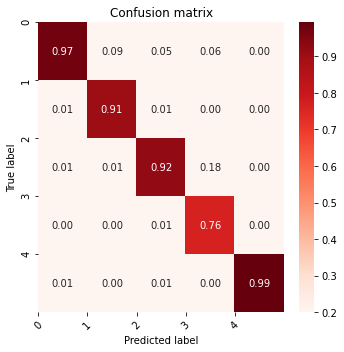

In [16]:
print(evaluate(y_val_true,ypred))
plot_confusion_matrix(y_val_true,ypred,sorted_labels)

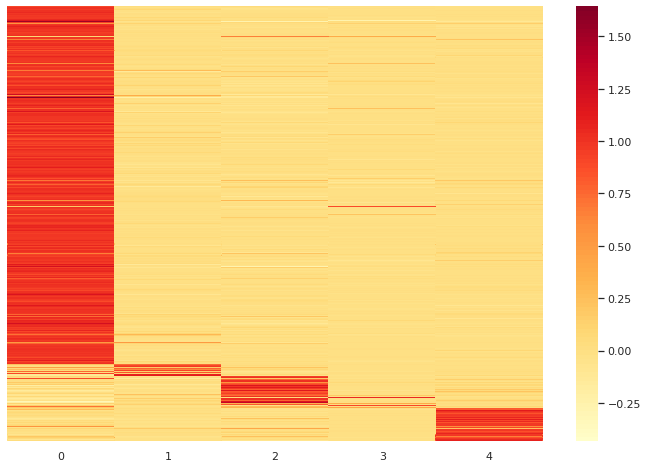

In [19]:
rcParams['figure.figsize'] = 12,8
sns.heatmap(
            nngp_mean[y_val_true.argsort(),:],
            xticklabels=1,
            yticklabels=False,
            cmap=sns.color_palette("YlOrRd", 100)
           )

In [0]:
from collections import defaultdict
dic = defaultdict(list)
dic_mean = defaultdict(list)
for i, _ in enumerate(y_val_true):
    it = str(y_val_true[i])+','+str(ypred[i])
    if it in dic.keys():
        dic[it] += [nngp_std[i]]
    else:
        dic[it] = [nngp_std[i]]

heat_var = np.ones([5,5])*0.006
for k in dic.keys():
    i = int(list(k)[0])
    j = int(list(k)[2])
    heat_var[i,j] = np.mean(dic[k])

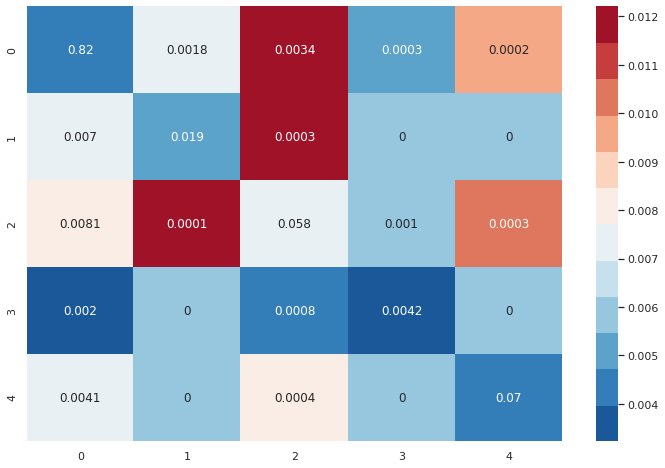

In [23]:
rcParams['figure.figsize'] = 12,8
sns.heatmap(heat_var, cmap=sns.color_palette("RdBu_r",12), annot = confusion_matrix(y_val_true,ypred)/len(y_val_true))